In [1]:
! cp C:\Users\amiti\Crypto_close_NFT_merge C:\Users\amiti\ape_mining\notebooks\amit

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns
import talib as ta
import pyfolio as pf

# Making pandas dataframe of csv files of crypto data 

In [97]:
data_ADA = pd.read_csv('D:/ML spring 2022/instruments_modified/ADA.csv')
data_AVAX = pd.read_csv('D:/ML spring 2022/instruments_modified/AVAX.csv')
data_FLOW = pd.read_csv('D:/ML spring 2022/instruments_modified/FLOW.csv')
data_MANA = pd.read_csv('D:/ML spring 2022/instruments_modified/MANA.csv')
data_MATIC = pd.read_csv('D:/ML spring 2022/instruments_modified/MATIC.csv')
data_SOL = pd.read_csv('D:/ML spring 2022/instruments_modified/SOL.csv')
data_TFUEL = pd.read_csv('D:/ML spring 2022/instruments_modified/TFUEL.csv')

# Dropping all columns except 'close' from crypto data

In [98]:
list(data_ADA.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [99]:
Col_dropped = ['Open', 'High', 'Low', 'Volume', 'Market Cap']

# ADA DATAFRAME with only close column

In [100]:
##ADA DATA

In [101]:
ADA_col_drop = data_ADA.drop(Col_dropped, axis = 1)
ADA_col_drop.columns = ADA_col_drop.columns.str.replace('Close', 'ADA_close')

# AVAX DATAFRAME with only close column

In [102]:
AVAX_col_drop = data_AVAX.drop(Col_dropped, axis = 1)
AVAX_col_drop.columns = AVAX_col_drop.columns.str.replace('Close', 'AVAX_close')

# FLOW DATAFRAME with only close column

In [103]:
FLOW_col_drop = data_FLOW.drop(Col_dropped, axis = 1)
FLOW_col_drop.columns = FLOW_col_drop.columns.str.replace('Close', 'FLOW_close')

# MANA DATAFRAME with only close column

In [104]:
MANA_col_drop = data_MANA.drop(Col_dropped, axis = 1)
MANA_col_drop.columns = MANA_col_drop.columns.str.replace('Close', 'MANA_close')


# MATIC DATAFRAME with only close column

In [105]:
MATIC_col_drop = data_MATIC.drop(Col_dropped, axis = 1)
MATIC_col_drop.columns = MATIC_col_drop.columns.str.replace('Close', 'MATIC_close')

# SOL DATAFRAME with only close column

In [106]:
SOL_col_drop = data_SOL.drop(Col_dropped, axis = 1)
SOL_col_drop.columns = SOL_col_drop.columns.str.replace('Close', 'SOL_close')

# TFUEL DATAFRAME with only close column

In [107]:
TFUEL_col_drop = data_TFUEL.drop(Col_dropped, axis = 1)
TFUEL_col_drop.columns = TFUEL_col_drop.columns.str.replace('Close', 'TFUEL_close')

# Merge different crypto close data. Seven in number, as created above

In [108]:
frames = [ADA_col_drop, AVAX_col_drop, FLOW_col_drop, MANA_col_drop, MATIC_col_drop, SOL_col_drop, TFUEL_col_drop]
df_merge_1 = pd.merge(ADA_col_drop, AVAX_col_drop, on='Date', how='left')
df_merge_2 = pd.merge(df_merge_1, FLOW_col_drop, on='Date', how='left')
df_merge_3 = pd.merge(df_merge_2, MANA_col_drop, on='Date', how='left')
df_merge_4 = pd.merge(df_merge_3, MATIC_col_drop, on='Date', how='left')
df_merge_5 = pd.merge(df_merge_4, SOL_col_drop, on='Date', how='left')
df_merge_6 = pd.merge(df_merge_5, TFUEL_col_drop, on='Date', how='left')
df = df_merge_6

# The merge DATAFRAME of seven different crypto instruments with 'close'  column information is named as df

In [109]:
df.shape

(1659, 8)

In [110]:
df.head(3)

,Date,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close
0,2017-10-02,0.025808,1.005247,0.391781,0.004487,0.001743,0.391811,0.003589
1,2017-10-03,0.020827,0.832866,0.324598,0.003718,0.001445,0.324623,0.002974
2,2017-10-04,0.021973,0.832882,0.324604,0.003718,0.001445,0.324629,0.002974


In [111]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(3)

,Date,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close
0,2017-10-02,0.025808,1.005247,0.391781,0.004487,0.001743,0.391811,0.003589
1,2017-10-03,0.020827,0.832866,0.324598,0.003718,0.001445,0.324623,0.002974
2,2017-10-04,0.021973,0.832882,0.324604,0.003718,0.001445,0.324629,0.002974


In [112]:
df.tail(3)

,Date,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close
1656,2022-04-15,0.955461,77.3439,5.892833,2.143850,1.396289,101.3964,0.167315
1657,2022-04-16,0.951969,77.8148,5.837938,2.151203,1.389984,102.1230,0.165885
1658,2022-04-17,0.916045,75.6096,5.573768,2.050578,1.337165,100.3029,0.161584


# NFT Market-tracker data from https://nonfungible.com/market-tracker

In [113]:
data_1 = pd.read_csv('D:/ML spring 2022/NFT sales data/1_no of sale and Sale USA.csv')
data_2 = pd.read_csv('D:/ML spring 2022/NFT sales data/2 Average USD _Active market wallets.csv')
data_3 = pd.read_csv('D:/ML spring 2022/NFT sales data/3_Primary Sales_Secondary sales.csv')
data_4 = pd.read_csv('D:/ML spring 2022/NFT sales data/4_Primary sales USD _Secondary sales.csv')
data_5 = pd.read_csv('D:/ML spring 2022/NFT sales data/5_Unique buyers _Unique sellers.csv')

# NFT data downloaded in different CSV are converted into DATAFRAME and merged as one with name df_NFT

In [114]:
df_merge_NFT_1 = pd.merge(data_1, data_2, on='DateTime', how='left')
df_merge_NFT_2 = pd.merge(df_merge_NFT_1, data_3, on='DateTime', how='left')
df_merge_NFT_3 = pd.merge(df_merge_NFT_2, data_4, on='DateTime', how='left')
df_merge_NFT_4 = pd.merge(df_merge_NFT_3, data_5, on='DateTime', how='left')
df_NFT = df_merge_NFT_4
#print(df_NFT.head(3))
print(list(df_NFT.columns))


['DateTime', 'Number of sales', 'Sales USD', 'Average USD', 'Active market wallets', 'Primary Sales', 'Secondary sales', 'Primary sales USD', 'Secondary sales USD', 'Unique buyers', 'Unique sellers']


# Passing DateTime col of df_NFT to datetime

In [115]:
df_NFT['DateTime'] = pd.to_datetime(df_NFT['DateTime'])
df_NFT.head(3)

,DateTime,Number of sales,Sales USD,Average USD,Active market wallets,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,Unique sellers
0,2017-06-22,0,0.00,NaN,0,0,0,0.0,0.00,0,0
1,2017-06-23,19,1020.30,53.70,8,0,19,0.0,1020.30,8,2
2,2017-06-24,21,1240.84,59.09,17,0,21,0.0,1240.84,9,10


In [116]:
df_NFT.shape

(1770, 11)

In [117]:
df_NFT.tail(3)

,DateTime,Number of sales,Sales USD,Average USD,Active market wallets,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,Unique sellers
1767,2022-04-23 23:59:00,15686,68755060.95,4383.21,14042,6426,9260,4105848.42,64649212.53,7963,6535
1768,2022-04-24 23:59:00,29869,47055305.26,1575.39,24157,5542,24327,3422766.45,43632538.81,13726,13367
1769,2022-04-25 23:59:00,29464,48134895.70,1633.69,23950,5548,23916,3247916.22,44886979.47,13517,13186


# Slice NFT data based on crypto DATA date records

In [118]:
start_date = '2017-10-02'
end_date = '2022-04-17'
mask = (df_NFT['DateTime'] >= start_date) & (df_NFT['DateTime'] <= end_date)
df_NFT_2 = df_NFT.loc[mask]
df_NFT_2.shape

(1659, 11)

### Changing name of "Datetime" column  to Date as in crypto dataframe

In [119]:
df_NFT_3 = df_NFT_2.rename(columns={"DateTime" : "Date"})
df_NFT_3.head(2)

,Date,Number of sales,Sales USD,Average USD,Active market wallets,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,Unique sellers
102,2017-10-02,0,0.0,NaN,0,0,0,0.0,0.0,0,0
103,2017-10-03,0,0.0,NaN,0,0,0,0.0,0.0,0,0


# Converting to csv file
csv file conatin NFT market-tracker data

In [120]:
df_NFT_3.to_csv('NFT_markettracker.csv')

In [121]:
df_merge_Crypto_NFT = pd.merge(df, df_NFT_3, on='Date', how='left')
df_MCN = df_merge_Crypto_NFT
df_MCN.head(2)

,Date,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close,Number of sales,Sales USD,Average USD,Active market wallets,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,Unique sellers
0,2017-10-02,0.025808,1.005247,0.391781,0.004487,0.001743,0.391811,0.003589,0,0.0,NaN,0,0,0,0.0,0.0,0,0
1,2017-10-03,0.020827,0.832866,0.324598,0.003718,0.001445,0.324623,0.002974,0,0.0,NaN,0,0,0,0.0,0.0,0,0


# Converting to csv file
csv file conatin NFT market-tracker data plus crypto['close'] data

In [122]:
df_MCN.to_csv('cryptO_NFT_markettracker.csv')

In [123]:
df_MCN.shape

(1659, 18)

# Data Visvalization to understand Crypto and NFT data

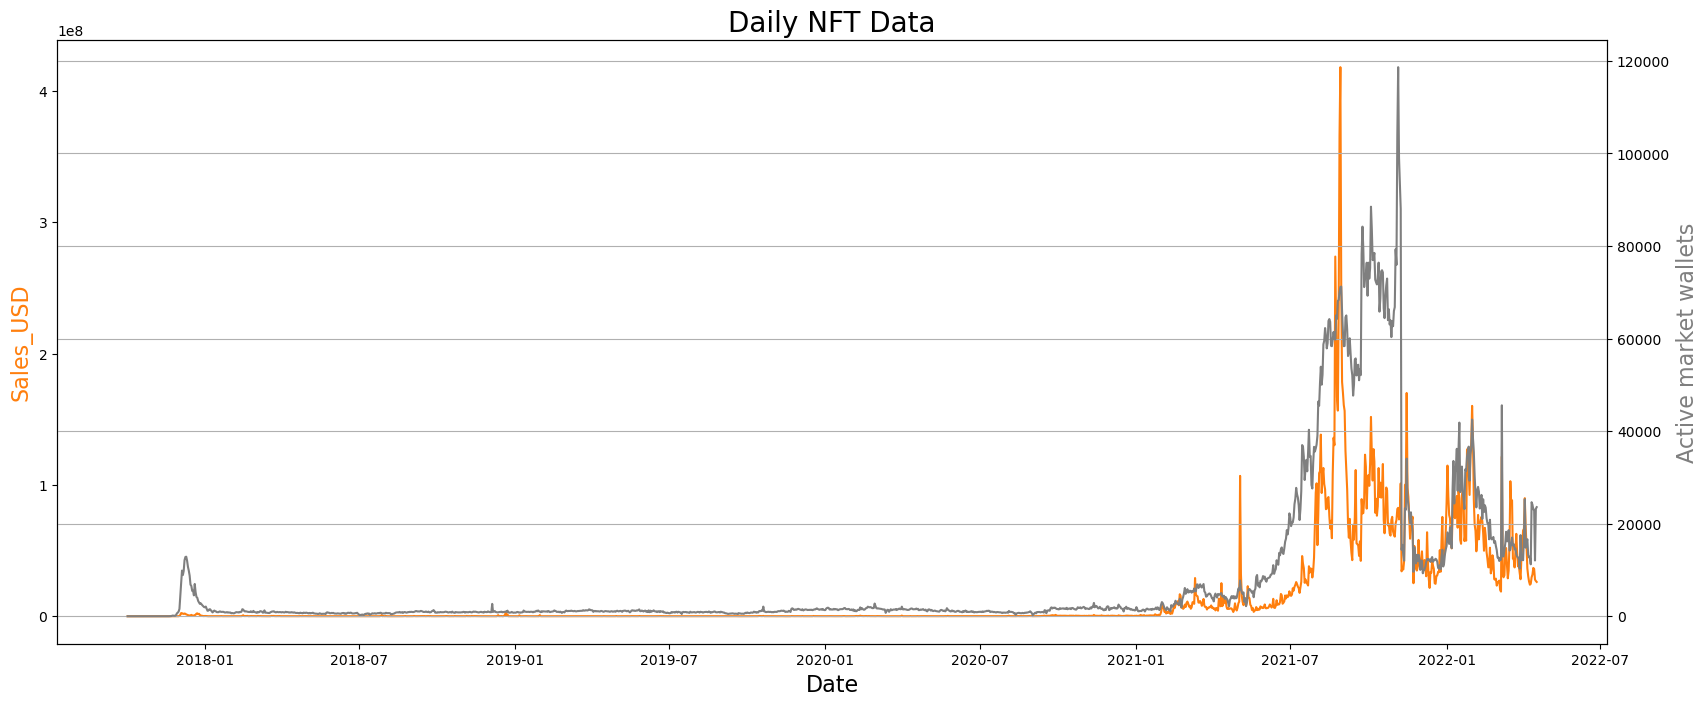

In [124]:
import matplotlib.pyplot as plt

#define colors to use
col2 = 'tab:grey'
col1 = 'tab:orange'

#define subplots
fig,ax = plt.subplots(figsize = (20,8), dpi=100)

#add first line to plot
ax.plot(df_MCN["Date"], df_MCN["Sales USD"], color=col1)

#add x-axis label
ax.set_xlabel('Date', fontsize=16)
#add y-axis label
ax.set_ylabel('Sales_USD', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(df_MCN["Date"], df_MCN["Active market wallets"], color=col2)

#add second y-axis label
ax2.set_ylabel('Active market wallets', color=col2, fontsize=16)

#add plot tittle
ax.set_title('Daily NFT Data', fontsize=20)
plt.grid()

# Comparison of crypto data with NFT sales data

Text(0.5, 1.0, 'Daily NFT sales (USD) versus SOL close data')

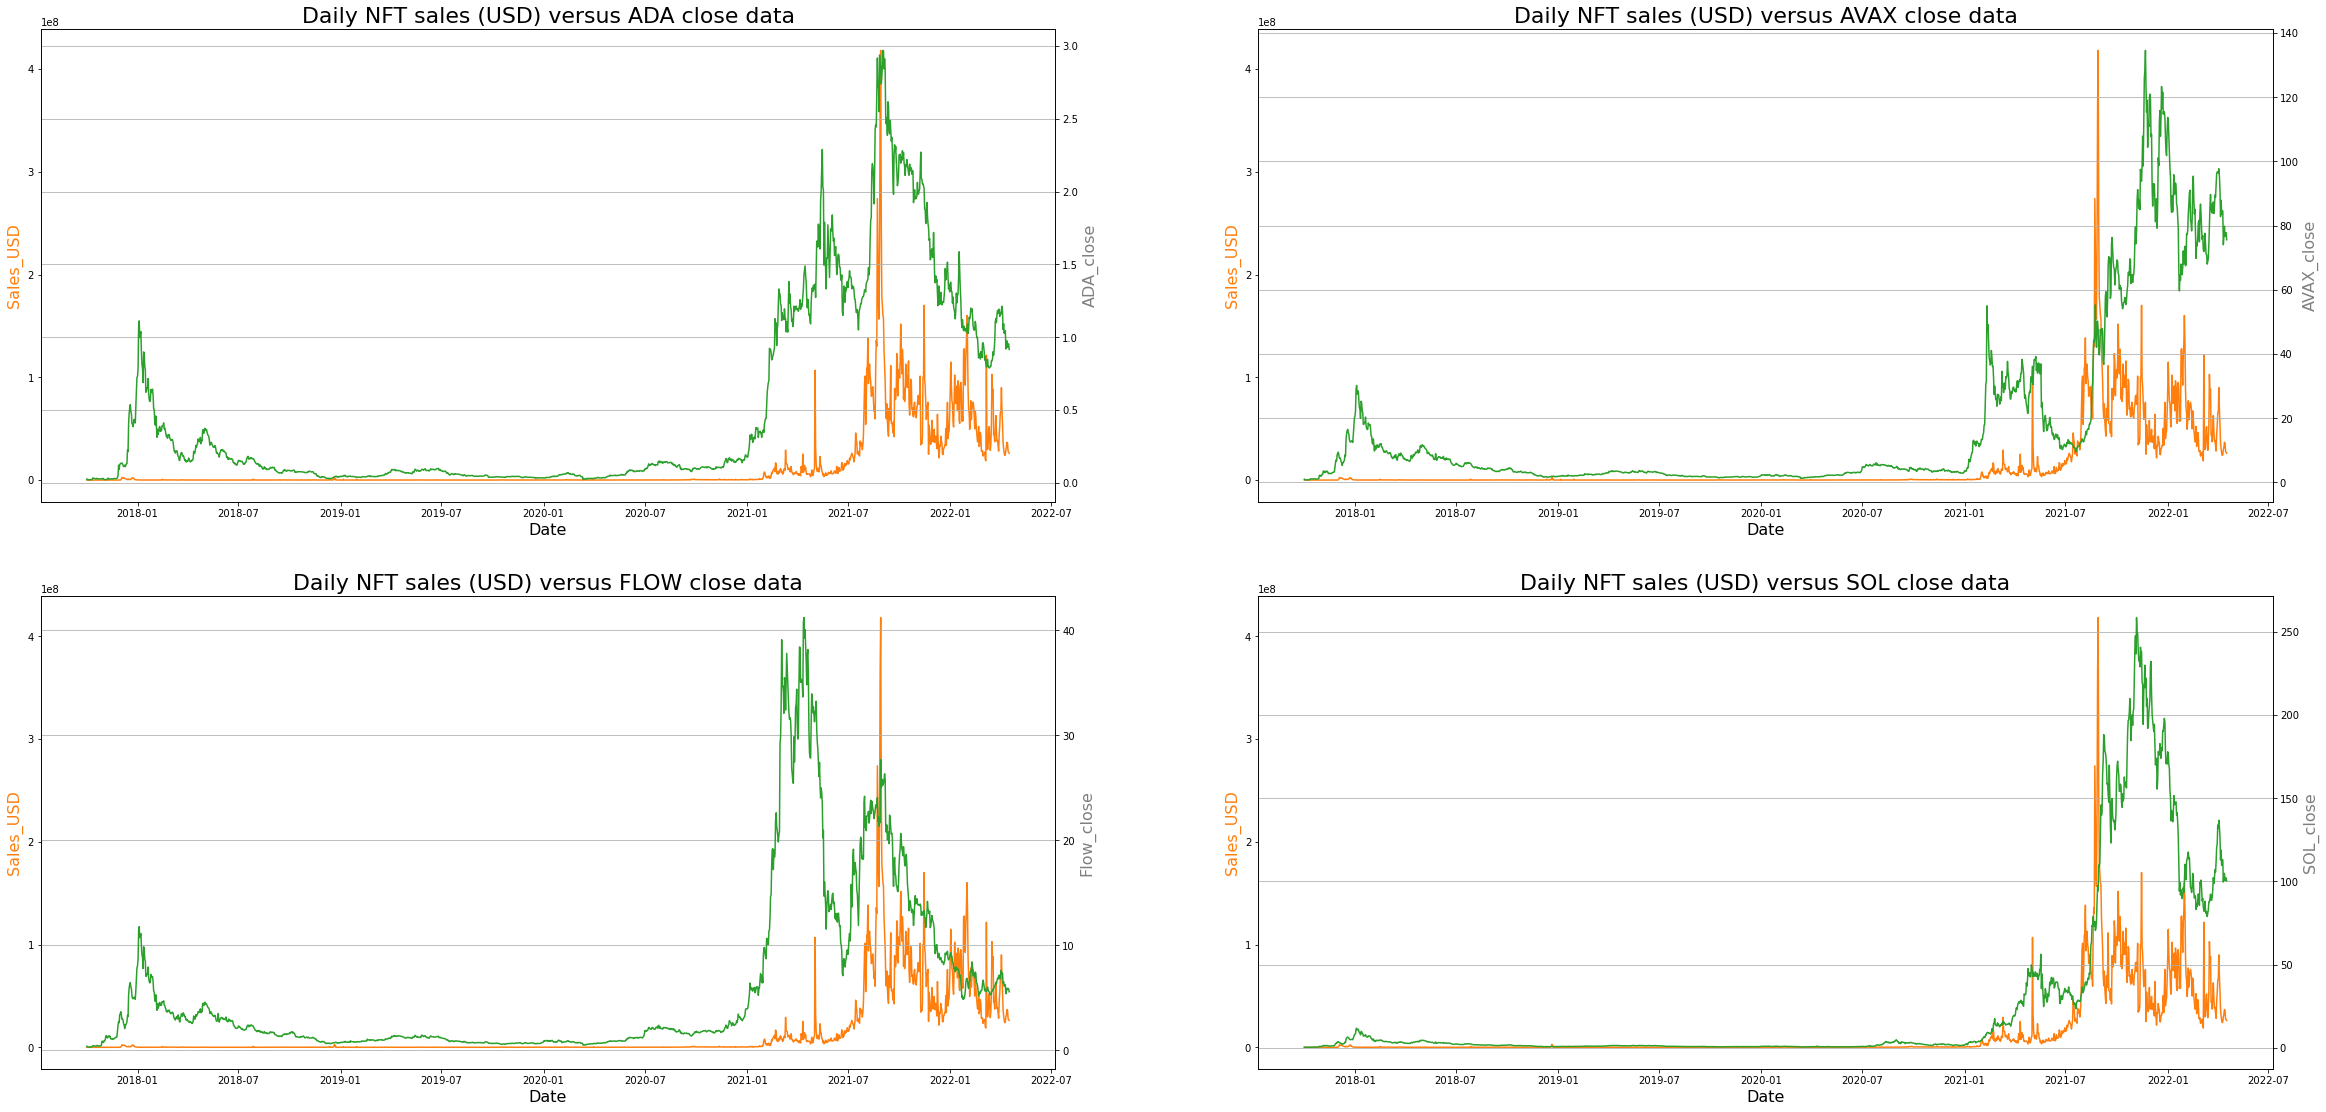

In [125]:
fig = plt.figure(figsize = (40,40))
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)

ax1.plot(df_MCN["Date"],df_MCN["Sales USD"], color='tab:orange')
ax1_t = ax1.twinx()
ax1_t.plot(df_MCN["Date"], df_MCN["ADA_close"], color='tab:green')
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Sales_USD', color=col1, fontsize=16)
ax1_t.set_ylabel('ADA_close', color=col2, fontsize=16)
plt.grid()
ax1.set_title('Daily NFT sales (USD) versus ADA close data', fontsize=22)

ax2.plot(df_MCN["Date"],df_MCN["Sales USD"], color='tab:orange')
ax2_t = ax2.twinx()
ax2_t.plot(df_MCN["Date"], df_MCN["AVAX_close"], color='tab:green')
ax2.set_xlabel('Date', fontsize=16)
ax2.set_ylabel('Sales_USD', color=col1, fontsize=16)
ax2_t.set_ylabel('AVAX_close', color=col2, fontsize=16)
plt.grid()
ax2.set_title('Daily NFT sales (USD) versus AVAX close data', fontsize=22)


ax3.plot(df_MCN["Date"],df_MCN["Sales USD"], color='tab:orange')
ax3_t = ax3.twinx()
ax3_t.plot(df_MCN["Date"], df_MCN["FLOW_close"], color='tab:green')
ax3.set_xlabel('Date', fontsize=16)
ax3.set_ylabel('Sales_USD', color=col1, fontsize=16)
ax3_t.set_ylabel('Flow_close', color=col2, fontsize=16)
plt.grid()
ax3.set_title('Daily NFT sales (USD) versus FLOW close data', fontsize=22)

ax4.plot(df_MCN["Date"],df_MCN["Sales USD"], color='tab:orange')
ax4_t = ax4.twinx()
ax4_t.plot(df_MCN["Date"], df_MCN["SOL_close"], color='tab:green')
ax4.set_xlabel('Date', fontsize=16)
ax4.set_ylabel('Sales_USD', color=col1, fontsize=16)
ax4_t.set_ylabel('SOL_close', color=col2, fontsize=16)
plt.grid()
ax4.set_title('Daily NFT sales (USD) versus SOL close data', fontsize=22)

# Correlation between Crypto and NFT data

In [126]:
#df_MCN.corr()

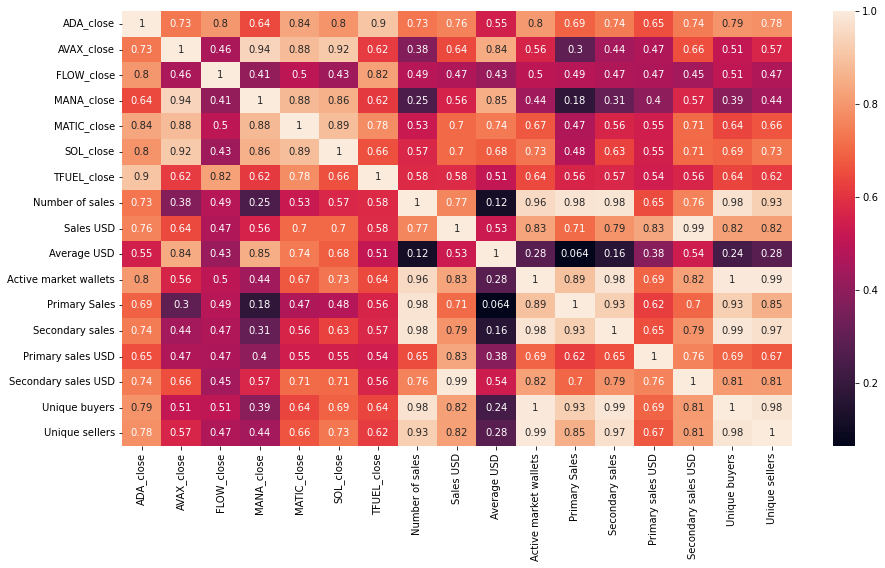

In [127]:
df_MCN.corr()
plt.figure(figsize = (15,8))
dataplot = sns.heatmap(df_MCN.corr(), annot=True)
plt.show()

# created pairplot 

In [128]:
##sns.pairplot(df_MCN)

# sliced dataframe from 2021-01-28 date

In [129]:
start_date_2 = '2021-01-28'
end_date = '2022-04-17'
mask = (df_MCN['Date'] >= start_date_2) & (df_MCN['Date'] <= end_date)
df_MCN_2 = df_MCN.loc[mask]
df_MCN_2.shape
df_MCN_2.columns
df_MCN_3 = df_MCN_2.copy()

# feature engineering

In [ ]:
## Calculating 
# 1. Rolling average of NFT features
# 2. target_close price of crypto 
# 3. Fifth day price of crypto from past data using .shift()
# 4. Fifth day price of crypto from past data using .shift()

In [130]:
df_MCN_3["Primary Sales_rolling average"] = df_MCN_2['Primary Sales'].rolling(window = 50).mean()
df_MCN_3["Sales USD_rolling average"] = df_MCN_2['Sales USD'].rolling(window = 50).mean()
df_MCN_3["Active market wallets_rolling average"] = df_MCN_2['Active market wallets'].rolling(window = 50).mean()
df_MCN_3["Primary sales USD_rolling average"] = df_MCN_2['Primary sales USD'].rolling(window = 50).mean()
df_MCN_3["Average USD_rolling average"] = df_MCN_2['Average USD'].rolling(window = 50).mean()
df_MCN_3["Secondary sales_rolling average"] = df_MCN_2['Secondary sales'].rolling(window = 50).mean()
df_MCN_3["Unique buyers_rolling average"] = df_MCN_2['Unique buyers'].rolling(window = 50).mean()
df_MCN_3["Unique sellers_rolling average"] = df_MCN_2['Unique sellers'].rolling(window = 50).mean()
df_MCN_3["Number of sales_rolling average"] = df_MCN_2['Number of sales'].rolling(window = 50).mean()
df_MCN_3["Secondary sales USD_rolling average"] = df_MCN_2['Secondary sales USD'].rolling(window = 50).mean()
df_MCN_3.tail(3)

,Date,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close,Number of sales,Sales USD,...,Primary Sales_rolling average,Sales USD_rolling average,Active market wallets_rolling average,Primary sales USD_rolling average,Average USD_rolling average,Secondary sales_rolling average,Unique buyers_rolling average,Unique sellers_rolling average,Number of sales_rolling average,Secondary sales USD_rolling average
1656,2022-04-15,0.955461,77.3439,5.892833,2.143850,1.396289,101.3964,0.167315,13542,27940930.86,...,4147.36,4.376340e+07,15919.18,4.570815e+06,2980.6708,11742.68,8944.90,8125.40,15890.04,3.919259e+07
1657,2022-04-16,0.951969,77.8148,5.837938,2.151203,1.389984,102.1230,0.165885,29586,26894315.89,...,4166.58,4.344112e+07,16040.74,4.548424e+06,2944.9558,11995.98,9031.76,8186.26,16162.56,3.889269e+07
1658,2022-04-17,0.916045,75.6096,5.573768,2.050578,1.337165,100.3029,0.161584,30672,26144607.64,...,4209.76,4.339835e+07,16195.50,4.490204e+06,2924.7720,12262.38,9139.16,8271.52,16472.14,3.890814e+07


In [131]:
df_MCN_3["ADA_close_target"] = df_MCN_2['ADA_close'].shift(1)
df_MCN_3["AVAX_close_target"] = df_MCN_2['AVAX_close'].shift(1)
df_MCN_3["FLOW_close_target"] = df_MCN_2['FLOW_close'].shift(1)
df_MCN_3["MANA_close_target"] = df_MCN_2['MANA_close'].shift(1)
df_MCN_3["MATIC_close_target"] = df_MCN_2['MATIC_close'].shift(1)
df_MCN_3["TFUEL_close_target"] = df_MCN_2['TFUEL_close'].shift(1)
df_MCN_3["SOL_close_target"] = df_MCN_2['SOL_close'].shift(1)

In [132]:
df_MCN_3["ADA_close_lagged"] = df_MCN_2['ADA_close'].shift(-5)
df_MCN_3["AVAX_close_lagged"] = df_MCN_2['AVAX_close'].shift(-5)
df_MCN_3["FLOW_close_lagged"] = df_MCN_2['FLOW_close'].shift(-5)
df_MCN_3["MANA_close_lagged"] = df_MCN_2['MANA_close'].shift(-5)
df_MCN_3["MATIC_close_lagged"] = df_MCN_2['MATIC_close'].shift(-5)
df_MCN_3["TFUEL_close_lagged"] = df_MCN_2['TFUEL_close'].shift(-5)
df_MCN_3["SOL_close_lagged"] = df_MCN_2['SOL_close'].shift(-5)

In [133]:
df_MCN_3["Primary Sales_lagged"] = df_MCN_2['Primary Sales'].shift(-5)
df_MCN_3["Sales USD_lagged"] = df_MCN_2['Sales USD'].shift(-5)
df_MCN_3["Active market wallets_lagged"] = df_MCN_2['Active market wallets'].shift(-5)
df_MCN_3["Primary sales USD_lagged"] = df_MCN_2['Primary sales USD'].shift(-5)
df_MCN_3["Average USD_lagged"] = df_MCN_2['Average USD'].shift(-5)
df_MCN_3["Secondary sales_lagged"] = df_MCN_2['Secondary sales'].shift(-5)
df_MCN_3["Unique buyers_lagged"] = df_MCN_2['Unique buyers'].shift(-5)
df_MCN_3["Unique sellers_lagged"] = df_MCN_2['Unique sellers'].shift(-5)
df_MCN_3["Number of sales_lagged"] = df_MCN_2['Number of sales'].shift(-5)
df_MCN_3["Secondary sales USD_lagged"] = df_MCN_2['Secondary sales USD'].shift(-5)

In [134]:
df_MCN_3["ADA_close__rolling average"] = df_MCN_2['ADA_close'].rolling(window = 50).mean()
df_MCN_3["AVAX_close_rolling average"] = df_MCN_2['AVAX_close'].rolling(window = 50).mean()
df_MCN_3["FLOW_close_rolling average"] = df_MCN_2['FLOW_close'].rolling(window = 50).mean()
df_MCN_3["MANA_close_rolling average"] = df_MCN_2['MANA_close'].rolling(window = 50).mean()
df_MCN_3["MATIC_close_rolling average"] = df_MCN_2['MATIC_close'].rolling(window = 50).mean()
df_MCN_3["TFUEL_close_rolling average"] = df_MCN_2['TFUEL_close'].rolling(window = 50).mean()
df_MCN_3["SOL_close_rolling average"] = df_MCN_2['SOL_close'].rolling(window = 50).mean()

In [135]:
df_MCN_3.tail(3)

,Date,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close,Number of sales,Sales USD,...,Unique sellers_lagged,Number of sales_lagged,Secondary sales USD_lagged,ADA_close__rolling average,AVAX_close_rolling average,FLOW_close_rolling average,MANA_close_rolling average,MATIC_close_rolling average,TFUEL_close_rolling average,SOL_close_rolling average
1656,2022-04-15,0.955461,77.3439,5.892833,2.143850,1.396289,101.3964,0.167315,13542,27940930.86,...,NaN,NaN,NaN,0.972348,82.370048,6.156708,2.483440,1.514967,0.174707,99.935725
1657,2022-04-16,0.951969,77.8148,5.837938,2.151203,1.389984,102.1230,0.165885,29586,26894315.89,...,NaN,NaN,NaN,0.973380,82.310294,6.160147,2.471708,1.511689,0.174650,100.127927
1658,2022-04-17,0.916045,75.6096,5.573768,2.050578,1.337165,100.3029,0.161584,30672,26144607.64,...,NaN,NaN,NaN,0.973984,82.190188,6.158047,2.459300,1.508204,0.174504,100.332781


In [136]:
df_MCN_4 = df_MCN_3.copy()

# feature engineering...contd!

In [137]:
#print(df_MCN['ADA_close'].corr(df_MCN['Number of sales']))

In [138]:
df_MCN_4["Primary Sales_EWMA50"] = df_MCN_3['Primary Sales'].ewm(span=50).mean()
df_MCN_4["Sales USD_EWMA50"] = df_MCN_3['Sales USD'].ewm(span=50).mean()
df_MCN_4["Active market wallets_EWMA50"] = df_MCN_3['Active market wallets'].ewm(span=50).mean()
df_MCN_4["Unique buyers_EWMA50"] = df_MCN_3['Unique buyers'].ewm(span=50).mean()
df_MCN_4["Average USD_EWMA50"] = df_MCN_3['Average USD'].ewm(span=50).mean()
df_MCN_4["Secondary sales_EWMA50"] = df_MCN_3['Secondary sales'].ewm(span=50).mean()
df_MCN_4["Unique buyers_EWMA50"] = df_MCN_3['Unique buyers'].ewm(span=50).mean()
df_MCN_4["Unique sellers_EWMA50"] = df_MCN_3['Unique sellers'].ewm(span=50).mean()
df_MCN_4["Number of sales_EWMA50"] = df_MCN_3['Number of sales'].ewm(span=50).mean()


In [139]:
df_MCN_4["ADA_close_EWMA50"] = df_MCN_3['ADA_close'].ewm(span=50).mean()
df_MCN_4["AVAX_close_EWMA50"] = df_MCN_3['AVAX_close'].ewm(span=50).mean()
df_MCN_4["FLOW_close_EWMA50"] = df_MCN_3['FLOW_close'].ewm(span=50).mean()
df_MCN_4["MANA_close_EWMA50"] = df_MCN_3['MANA_close'].ewm(span=50).mean()
df_MCN_4["MATIC_close_EWMA50"] = df_MCN_3['MATIC_close'].ewm(span=50).mean()
df_MCN_4["SOL_close_EWMA50"] = df_MCN_3['SOL_close'].ewm(span=50).mean()
df_MCN_4["TFUEL_close_EWMA50"] = df_MCN_3['TFUEL_close'].ewm(span=50).mean()

In [140]:
df_MCN_4.tail(3)

,Date,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close,Number of sales,Sales USD,...,Secondary sales_EWMA50,Unique sellers_EWMA50,Number of sales_EWMA50,ADA_close_EWMA50,AVAX_close_EWMA50,FLOW_close_EWMA50,MANA_close_EWMA50,MATIC_close_EWMA50,SOL_close_EWMA50,TFUEL_close_EWMA50
1656,2022-04-15,0.955461,77.3439,5.892833,2.143850,1.396289,101.3964,0.167315,13542,27940930.86,...,13584.408865,8947.923662,17890.616589,1.027300,83.586438,6.364906,2.494102,1.547052,106.506013,0.180124
1657,2022-04-16,0.951969,77.8148,5.837938,2.151203,1.389984,102.1230,0.165885,29586,26894315.89,...,14027.059506,9061.769795,18349.259085,1.024346,83.360099,6.344241,2.480655,1.540893,106.334130,0.179565
1658,2022-04-17,0.916045,75.6096,5.573768,2.050578,1.337165,100.3029,0.161584,30672,26144607.64,...,14438.547376,9189.857257,18832.503835,1.020099,83.056158,6.314026,2.463790,1.532903,106.097611,0.178860


In [141]:
print(df_MCN_4.columns)
print(len(df_MCN_4.columns))

Index(['Date', 'ADA_close', 'AVAX_close', 'FLOW_close', 'MANA_close',
       'MATIC_close', 'SOL_close', 'TFUEL_close', 'Number of sales',
       'Sales USD', 'Average USD', 'Active market wallets', 'Primary Sales',
       'Secondary sales', 'Primary sales USD', 'Secondary sales USD',
       'Unique buyers', 'Unique sellers', 'Primary Sales_rolling average',
       'Sales USD_rolling average', 'Active market wallets_rolling average',
       'Primary sales USD_rolling average', 'Average USD_rolling average',
       'Secondary sales_rolling average', 'Unique buyers_rolling average',
       'Unique sellers_rolling average', 'Number of sales_rolling average',
       'Secondary sales USD_rolling average', 'ADA_close_target',
       'AVAX_close_target', 'FLOW_close_target', 'MANA_close_target',
       'MATIC_close_target', 'TFUEL_close_target', 'SOL_close_target',
       'ADA_close_lagged', 'AVAX_close_lagged', 'FLOW_close_lagged',
       'MANA_close_lagged', 'MATIC_close_lagged', 'TFUEL_clo

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm

In [191]:
df_MCN_5 = df_MCN_4.copy()

In [262]:
df_MCN_6 = df_MCN_5.dropna()
df_MCN_6 = df_MCN_6.set_index('Date')
df_MCN_6.head(2)


,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close,Number of sales,Sales USD,Average USD,...,Secondary sales_EWMA50,Unique sellers_EWMA50,Number of sales_EWMA50,ADA_close_EWMA50,AVAX_close_EWMA50,FLOW_close_EWMA50,MANA_close_EWMA50,MATIC_close_EWMA50,SOL_close_EWMA50,TFUEL_close_EWMA50
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-18,1.232563,33.220000,31.518265,0.982178,0.391566,14.21,0.355128,10003,10374732.77,1037.16,...,2913.049867,2144.108743,7234.002916,1.056716,29.785976,26.878870,0.50445,0.242329,12.562280,0.184883
2021-03-19,1.297490,37.710431,31.680000,0.967688,0.406408,14.14,0.346987,10123,7961582.09,786.48,...,2923.640281,2166.551270,7364.224911,1.067569,30.143172,27.095282,0.52533,0.249725,12.633396,0.192190


In [287]:
df_MCN_6.shape

(391, 73)

In [263]:
Z = ['ADA_close', 'AVAX_close', 'SOL_close', 'ADA_close__rolling average', 'ADA_close_EWMA50', 'ADA_close_lagged']
df_MCN_6.loc['2021-03-18', Z]

ADA_close                      1.232563
AVAX_close                    33.220000
SOL_close                     14.210000
ADA_close__rolling average     0.929826
ADA_close_EWMA50               1.056716
ADA_close_lagged               1.127564
Name: 2021-03-18 00:00:00, dtype: float64

In [264]:
X= df_MCN_6[['ADA_close', 'AVAX_close', 'SOL_close', 'ADA_close__rolling average', 'ADA_close_EWMA50', 'ADA_close_lagged']]
Y= df_MCN_6['ADA_close_target']


In [ ]:
#########################

In [277]:
A=[]
for i in df_MCN_6.index:
    A.append(df_MCN_6.loc[i, Z])

In [265]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [268]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn

New_prediction = df_MCN_6.loc['2021-03-18', Z]
print ('Predicted Price: \n', regr.predict([New_prediction]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -0.11700562654752056
Coefficients: 
 [ 7.65098937e-01  3.76549713e-04 -6.27047245e-04 -4.58480958e-01
  7.62445456e-01  3.51862533e-02]
Predicted Price: 
 [1.24868143]
                            OLS Regression Results                            
Dep. Variable:       ADA_close_target   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2275.
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.48e-296
Time:                        11:24:48   Log-Likelihood:                 414.32
No. Observations:                 391   AIC:                            -814.6
Df Residuals:                     384   BIC:                            -786.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             

C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [284]:
P = []
for x in A:
    P.append(regr.predict([x]))
print(P)

[array([1.24868143]), array([1.29773043]), array([1.22745336]), array([1.21097977]), array([1.14162454]), array([1.15065315]), array([1.10267017]), array([1.11938059]), array([1.2017015]), array([1.17067678]), array([1.17689673]), array([1.18447969]), array([1.1927732]), array([1.17592483]), array([1.1725806]), array([1.17573424]), array([1.16182861]), array([1.17676285]), array([1.19062232]), array([1.22357324]), array([1.17184386]), array([1.20499876]), array([1.18996843]), array([1.20764157]), array([1.24353995]), array([1.28571346]), array([1.36456187]), array([1.39046025]), array([1.42106604]), array([1.37575626]), array([1.34205117]), array([1.25485611]), array([1.20079312]), array([1.24609482]), array([1.21200171]), array([1.16459222]), array([1.16750118]), array([1.12423224]), array([1.10544759]), array([1.22091514]), array([1.27800797]), array([1.30399808]), array([1.28368884]), array([1.32759228]), array([1.33243502]), array([1.3127605]), array([1.34220689]), array([1.2765565

C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\amiti\anaconda3\envs\amitzipline\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Us

In [298]:
df_MCN_6['ADA_target_pred'] = np.array(P)


In [300]:
L = ['ADA_close_target', 'ADA_target_pred']
df_MCN_7 = df_MCN_6.loc[:, L]
df_MCN_7.head(5)

,ADA_close_target,ADA_target_pred
Date,,
2021-03-18,1.381509,1.248681
2021-03-19,1.232563,1.297730
2021-03-20,1.297490,1.227453
2021-03-21,1.210000,1.210980
2021-03-22,1.188872,1.141625


In [302]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df_MCN_7.ADA_close_target, df_MCN_7.ADA_target_pred))
rmse

0.08386293347333099

# Polynomial Regression

In [278]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform()

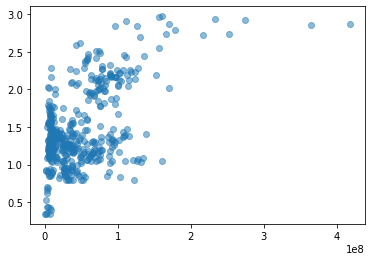

In [183]:

#x = df_MCN_4['Sales USD']
#y = df_MCN_4['ADA_close']

#plt.scatter(x, y, alpha=0.5)
#plt.show()

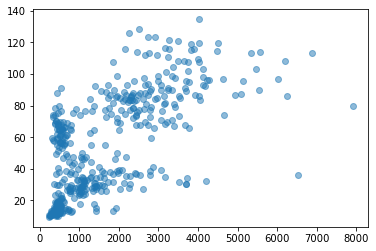

In [49]:
x = df_MCN_4['Average USD']
y = df_MCN_4['AVAX_close']
#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha= .5)
plt.show()